In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("mnist_dataset.csv")

In [7]:
# y is our target and x is independent value
features = df.columns[1:]
x = df[features]
y = df['label']

In [8]:
x.shape, y.shape

((42000, 784), (42000,))

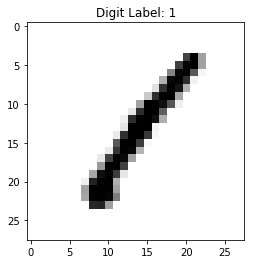

In [41]:
# first row is first image
i_image = x.loc[0,:]
i_label = y[0]
# 784 columns correspond to 28x28 image
plot_image = np.reshape(i_image.values, (28,28))
# plot the image
plt.imshow(plot_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(i_label))
plt.show()

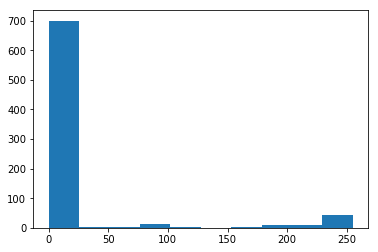

In [53]:
# histogram of image’s pixel values to show the range. These images aren’t actually black and white (0,1). 
#They are gray – scale (0,255).
plt.hist(x.iloc[0])
plt.show()
plt.savefig('hist.png')

In [57]:
# check how balanced our dataset is
y_labels = y.value_counts(normalize=True)
y_labels

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [9]:
x1 = df.iloc[0:9000, 1:]
y1 = df.iloc[0:9000, :1]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=7)

In [11]:
scaler = StandardScaler()
#scaler.fit(x_train)

In [12]:
# Apply transform to both the training set and the test set.
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [13]:
# Make an instance of the Model
pca = PCA(.95)

In [61]:
pca.n_components_

277

In [14]:
pca.fit(x_train_std)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [16]:
seed = 7
scoring = 'accuracy'
kfold = KFold(n_splits=10, random_state= seed)

In [17]:
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

In [18]:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x_train_pca, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.891111 (+/- 0.008079)


C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.857639 (+/- 0.014988)
kNN: 0.905000 (+/- 0.012763)
 DT: 0.728194 (+/- 0.017992)
 NB: 0.553194 (+/- 0.015885)
SVM: 0.911667 (+/- 0.009069)


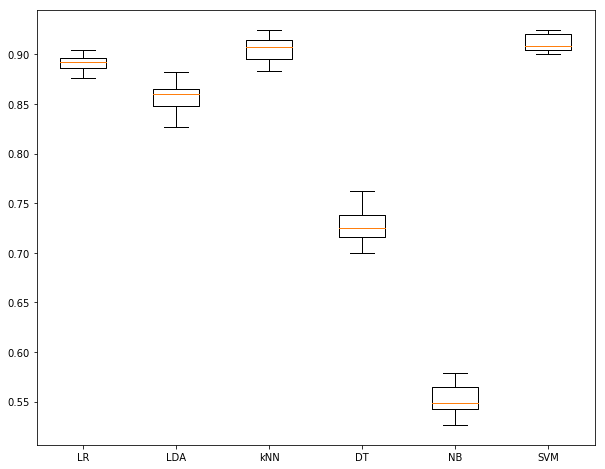

In [62]:
plt.figure(figsize = (10,8))
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

In [19]:
from sklearn.grid_search import GridSearchCV

C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
parameters = {'kernel':['linear', 'rbf'], 'gamma': [1, 0.1, 0.001], 'C': [1, 10, 100], 'random_state':[7]}

In [21]:
model = SVC()
grid = GridSearchCV(estimator = model,param_grid = parameters, refit = True, verbose=2, cv=10)

In [22]:
grid.fit(x_train_pca, y_train.values.ravel())

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.4s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.4s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.5s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.7s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.4s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.4s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.4s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] ............ C=1, gamma=1, kernel=linear, random_state=7 -   3.5s
[CV] C=1, gamma=1, kernel=linear, random_state=7 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 41.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'gamma': [1, 0.1, 0.001], 'C': [1, 10, 100], 'random_state': [7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [23]:
print (grid.best_score_)
print (grid.best_estimator_)

0.94375
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
grid_best = grid.best_params_

In [25]:
clf = SVC(C=grid_best['C'], gamma=grid_best['gamma'], kernel=grid_best['kernel'], random_state=grid_best['random_state'])

In [26]:
clf.fit(x_train_pca, y_train.values.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_pred = clf.predict(x_test_pca)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print (accuracy_score(y_test, y_pred))

0.945555555556


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[170,   0,   1,   0,   1,   1,   0,   2,   0,   0],
       [  0, 194,   1,   0,   1,   0,   1,   0,   2,   1],
       [  0,   0, 180,   2,   2,   0,   0,   0,   1,   0],
       [  0,   2,  10, 188,   0,   2,   0,   1,   1,   0],
       [  0,   0,   2,   0, 163,   0,   0,   2,   0,   4],
       [  1,   0,   3,   4,   2, 149,   1,   0,   0,   1],
       [  2,   1,   1,   0,   1,   0, 165,   0,   0,   0],
       [  2,   2,   4,   1,   2,   0,   0, 172,   0,   2],
       [  1,   2,   4,   1,   1,   2,   1,   1, 145,   1],
       [  1,   1,   3,   1,   3,   1,   0,   4,   0, 176]], dtype=int64)